In [2]:
import os
import cv2

import shutil

import pandas as pd

import numpy as np

from shutil import move

from subprocess import call

import matplotlib.pyplot as plt

from urllib.request import urlretrieve

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [3]:
# Creating the directories

base_dr = os.getcwd()

# Generating the paths

extraction_point = os.path.join(base_dr, 'data','extracted_raw')
processed_data_path = os.path.join(base_dr, 'data','processed')

# Generatingb the directories

os.makedirs(extraction_point)
os.makedirs(processed_data_path)

In [4]:
# Downloading the data from Git hub by using url address


dataset_url = "http://aisdatasets.informatik.uni-freiburg.de/" \
              "freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz"

print("Downloading dataset.")
urlretrieve(dataset_url, "../freiburg_groceries_dataset.tar.gz")
print("Extracting dataset.")
call(["tar", "-xf", "../freiburg_groceries_dataset.tar.gz", "-C", extraction_point])
os.remove("../freiburg_groceries_dataset.tar.gz")
print("Done.")

Extracting dataset.
Done.


In [5]:
image_path = '/content/data/extracted_raw/images/BEANS/BEANS0000.png'

image_matrix = cv2.imread(image_path)

In [7]:
image_matrix.shape

(256, 256, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

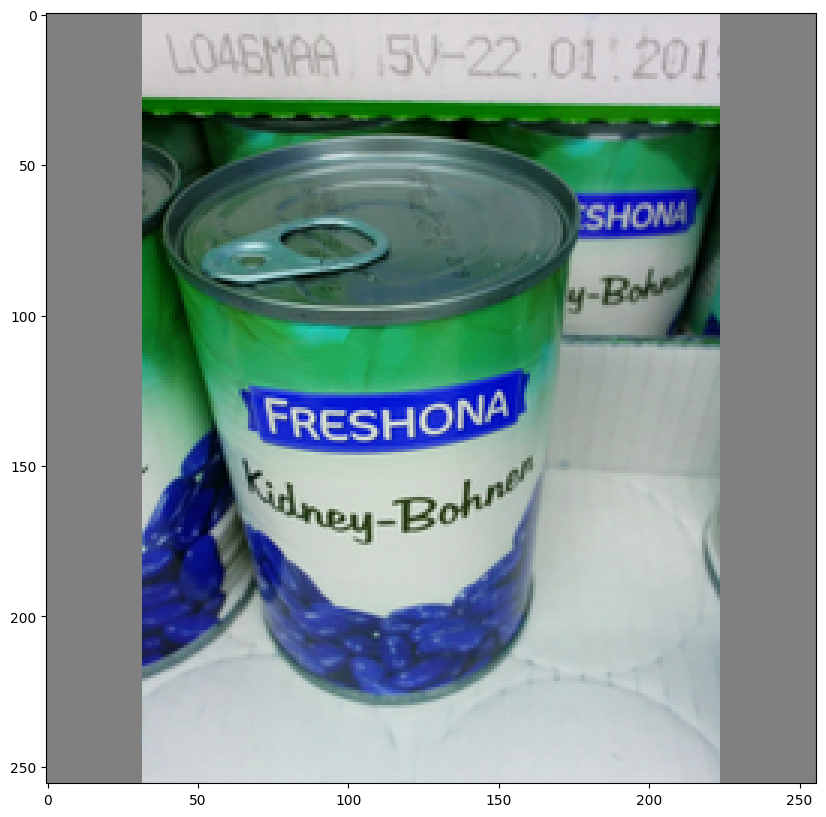

In [8]:
plt.figure(figsize = (12,10))
plt.imshow(image_matrix)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

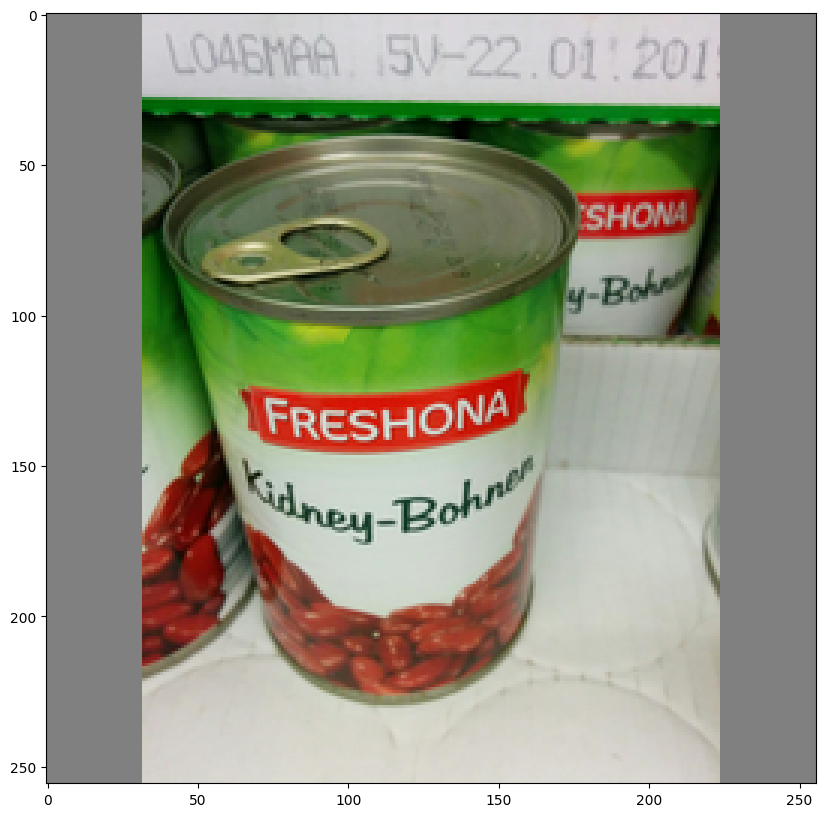

In [9]:
plt.figure(figsize = (12,10))
plt.imshow(cv2.cvtColor(image_matrix, cv2.COLOR_BGR2RGB))
plt.show

In [13]:
os.makedirs('/content/data/extracted_raw/image1/PASTA', exist_ok = True)
os.makedirs('/content/data/extracted_raw/image1/FLOUR', exist_ok = True)
os.makedirs('/content/data/extracted_raw/image1/CEREAL', exist_ok = True)
os.makedirs('/content/data/extracted_raw/image1/TEA', exist_ok = True)
os.makedirs('/content/data/extracted_raw/image1/BEANS', exist_ok = True)

In [21]:
images_1 = [f for f in os.listdir('/content/data/extracted_raw/images/PASTA')]
images_2 = [f for f in os.listdir('/content/data/extracted_raw/images/FLOUR')]
images_3 = [f for f in os.listdir('/content/data/extracted_raw/images/CEREAL')]
images_4 = [f for f in os.listdir('/content/data/extracted_raw/images/TEA')]
images_5 = [f for f in os.listdir('/content/data/extracted_raw/images/BEANS')]

for image in images_1:
  old_path = '/content/data/extracted_raw/images/PASTA/'+ image
  new_path = '/content/data/extracted_raw/image1/PASTA/'+ image
  shutil.move(old_path, new_path)

for image in images_2:
  old_path = '/content/data/extracted_raw/images/FLOUR/'+ image
  new_path = '/content/data/extracted_raw/image1/FLOUR/'+ image
  shutil.move(old_path, new_path)

for image in images_3:
  old_path = '/content/data/extracted_raw/images/CEREAL/'+ image
  new_path = '/content/data/extracted_raw/image1/CEREAL/'+ image
  shutil.move(old_path, new_path)

for image in images_4:
  old_path = '/content/data/extracted_raw/images/TEA/'+ image
  new_path = '/content/data/extracted_raw/image1/TEA/'+ image
  shutil.move(old_path, new_path)

for image in images_5:
  old_path = '/content/data/extracted_raw/images/BEANS/'+ image
  new_path = '/content/data/extracted_raw/image1/BEANS/'+ image
  shutil.move(old_path, new_path)

# Data Augmentation (ImageDataGenerator)

### base_dir

#### train

##### class1
##### class2
##### class3
##### class4
##### class5

#### test

##### class1
##### class2
##### class3
##### class4
##### class5



In [22]:
def directory_system_generator(source_directory, sink_directory):
  train_path, test_path = os.path.join(sink_directory, 'train'), os.path.join(sink_directory, 'test')

  classes = os.listdir(source_directory)
  train_classes_path = [os.path.join(train_path, class_) for class_ in classes ]
  test_classes_path = [os.path.join(test_path, class_) for class_ in classes ]

  print('working on the train directories')

  try:
    list(map(os.makedirs, train_classes_path ))
  except Exception as e:
    print('directory already exist')

  print('working on the test directories')

  try:
    list(map(os.makedirs, test_classes_path ))
  except Exception as e:
    print('directory already exist')

  print('sucessful')

  return train_path, test_path, classes




In [23]:
train_path, test_path, classes = directory_system_generator(source_directory= '/content/data/extracted_raw/image1', sink_directory= '/content/data/processed')

working on the train directories
working on the test directories
sucessful


In [24]:
classes

['TEA', 'BEANS', 'FLOUR', 'CEREAL', 'PASTA']

In [25]:
def file_mover(source_directory, sink_directory, classes, test_size = 0.2, random_state = 64, format = '.png' ):
  for class_name in classes:
    print(f'working on {class_name} class')

    class_src_path = os.path.join(source_directory, class_name)
    all_images = [i for i in os.listdir(class_src_path) if i.endswith(format)]
    print(f'total images found : {len(all_images)}')

    all_images = pd.Series(all_images)
    train, test = train_test_split(all_images, test_size = test_size, random_state = random_state)

    train_source_paths = [os.path.join(class_src_path, file_path) for file_path in train ]
    train_data_sink = os.path.join(sink_directory, 'train',class_name)
    train_sink_paths = [os.path.join(train_data_sink, file_path) for file_path in train ]

    test_source_paths = [os.path.join(class_src_path, file_path) for file_path in test ]
    test_data_sink = os.path.join(sink_directory, 'test',class_name)
    test_sink_paths = [os.path.join(test_data_sink, file_path) for file_path in test ]

    list(map(move, train_source_paths,train_sink_paths))
    list(map(move, test_source_paths, test_sink_paths))

    print(f'all files moved for {class_name} class')
    print("*"*114)

  print('sucessful')





In [26]:
file_mover(source_directory = '/content/data/extracted_raw/image1', sink_directory= '/content/data/processed', classes = classes)

working on TEA class
total images found : 283
all files moved for TEA class
******************************************************************************************************************
working on BEANS class
total images found : 136
all files moved for BEANS class
******************************************************************************************************************
working on FLOUR class
total images found : 109
all files moved for FLOUR class
******************************************************************************************************************
working on CEREAL class
total images found : 278
all files moved for CEREAL class
******************************************************************************************************************
working on PASTA class
total images found : 172
all files moved for PASTA class
******************************************************************************************************************
sucessful
